In [1]:
# Importing necessary libraries
!pip install --upgrade scikit-learn
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading and Previewing the data
- train data(fifa 21) and test Data for testing how good is the model that we are going to train(fifa 22)

In [2]:
# Step 1: Loading and Previewing the Data
train_data = pd.read_csv('/content/drive/MyDrive/ML/AI_Mid_Sem_Project/players_21.csv')
test_data = pd.read_csv('/content/drive/MyDrive/ML/AI_Mid_Sem_Project/players_22.csv')
train_data.head()

<ipython-input-2-7620df20cb51>:3: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv('/content/drive/MyDrive/ML/AI_Mid_Sem_Project/players_22.csv')


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


# Explatory Data Analysis and Data cleaning for data preparation


In [3]:
# viewing which columns of the dataset are numerical
train_data.select_dtypes(include='number').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   sofifa_id                    18944 non-null  int64  
 1   overall                      18944 non-null  int64  
 2   potential                    18944 non-null  int64  
 3   value_eur                    18707 non-null  float64
 4   wage_eur                     18719 non-null  float64
 5   age                          18944 non-null  int64  
 6   height_cm                    18944 non-null  int64  
 7   weight_kg                    18944 non-null  int64  
 8   club_team_id                 18719 non-null  float64
 9   league_level                 18719 non-null  float64
 10  club_jersey_number           18719 non-null  float64
 11  club_contract_valid_until    18719 non-null  float64
 12  nationality_id               18944 non-null  int64  
 13  nation_team_id  

In [4]:
#Viewing the shape of our dataset
train_data.shape

(18944, 110)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 15.9+ MB


### Eliminating/Removing unwanted columns
- NB every preprocessing made on our train data set is also gonna be done on the test data

In [6]:
col_to_drop = ['sofifa_id','player_url','short_name','long_name','player_positions','dob','club_team_id','club_loaned_from',
                 'club_joined','club_contract_valid_until','club_jersey_number','nationality_id','nation_team_id','nation_position',
                 'nation_jersey_number','real_face','player_tags','player_traits','goalkeeping_speed','player_face_url', 	'club_logo_url',
                 'club_flag_url', 'nation_logo_url', 	'nation_flag_url']
train_data.drop(col_to_drop,axis = 1, inplace = True)
test_data.drop(col_to_drop,axis=1, inplace = True)

In [7]:
#Viewing the test_data information
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 86 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      19239 non-null  int64  
 1   potential                    19239 non-null  int64  
 2   value_eur                    19165 non-null  float64
 3   wage_eur                     19178 non-null  float64
 4   age                          19239 non-null  int64  
 5   height_cm                    19239 non-null  int64  
 6   weight_kg                    19239 non-null  int64  
 7   club_name                    19178 non-null  object 
 8   league_name                  19178 non-null  object 
 9   league_level                 19178 non-null  float64
 10  club_position                19178 non-null  object 
 11  nationality_name             19239 non-null  object 
 12  preferred_foot               19239 non-null  object 
 13  weak_foot       

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 86 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   overall                      18944 non-null  int64  
 1   potential                    18944 non-null  int64  
 2   value_eur                    18707 non-null  float64
 3   wage_eur                     18719 non-null  float64
 4   age                          18944 non-null  int64  
 5   height_cm                    18944 non-null  int64  
 6   weight_kg                    18944 non-null  int64  
 7   club_name                    18719 non-null  object 
 8   league_name                  18719 non-null  object 
 9   league_level                 18719 non-null  float64
 10  club_position                18719 non-null  object 
 11  nationality_name             18944 non-null  object 
 12  preferred_foot               18944 non-null  object 
 13  weak_foot       

In [9]:
#Dealing with categorical columns with missing values first
train_data['club_name'].fillna('no club',inplace = True)
train_data['club_position'].fillna('unknown',inplace = True)
train_data['league_name'].fillna('unkown',inplace = True)
test_data['club_name'].fillna('no club',inplace = True)
test_data['club_position'].fillna('unknown',inplace = True)
test_data['league_name'].fillna('unkown',inplace = True)

array([[<Axes: title={'center': 'overall'}>,
        <Axes: title={'center': 'potential'}>,
        <Axes: title={'center': 'value_eur'}>,
        <Axes: title={'center': 'wage_eur'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'height_cm'}>,
        <Axes: title={'center': 'weight_kg'}>],
       [<Axes: title={'center': 'league_level'}>,
        <Axes: title={'center': 'weak_foot'}>,
        <Axes: title={'center': 'skill_moves'}>,
        <Axes: title={'center': 'international_reputation'}>,
        <Axes: title={'center': 'release_clause_eur'}>,
        <Axes: title={'center': 'pace'}>,
        <Axes: title={'center': 'shooting'}>],
       [<Axes: title={'center': 'passing'}>,
        <Axes: title={'center': 'dribbling'}>,
        <Axes: title={'center': 'defending'}>,
        <Axes: title={'center': 'physic'}>,
        <Axes: title={'center': 'attacking_crossing'}>,
        <Axes: title={'center': 'attacking_finishing'}>,
        <Axes: title={'center'

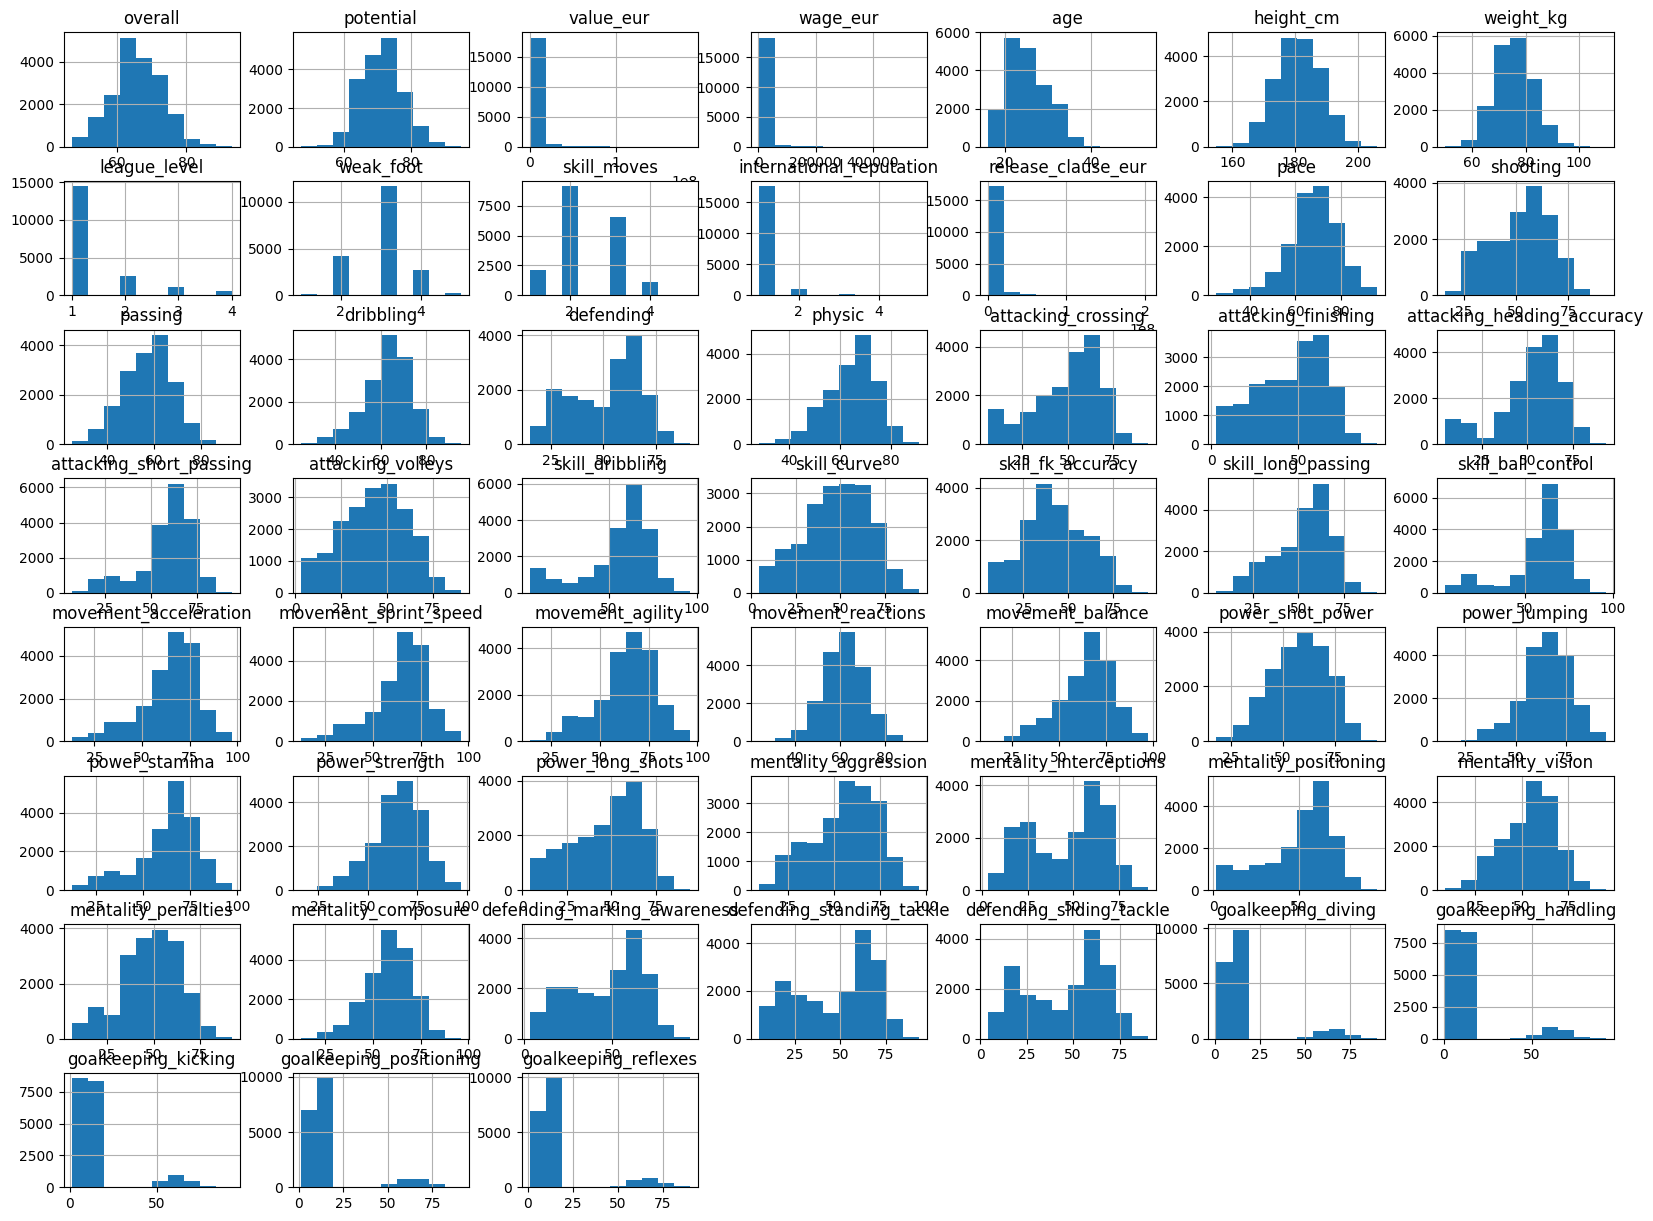

In [10]:
train_data.hist(figsize=(20,15))

In [11]:
train_data.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18944.000000,18944.000000,1.870700e+04,18719.000000,18944.000000,18944.000000,18944.000000,18719.000000,18944.000000,18944.000000,...,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
mean,65.677787,71.086729,2.902288e+06,9148.482825,25.225823,181.190773,75.016892,1.355468,2.936603,2.363017,...,48.050412,57.978674,46.470017,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309
std,7.002278,6.109985,7.743775e+06,19893.149956,4.697354,6.825672,7.057140,0.739015,0.667132,0.766469,...,15.671721,12.118390,20.169591,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121
min,47.000000,47.000000,9.000000e+03,500.000000,16.000000,155.000000,50.000000,1.000000,1.000000,1.000000,...,6.000000,12.000000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,1.000000,3.000000,2.000000,...,38.750000,50.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1.000000,3.000000,2.000000,...,49.000000,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,1.000000,3.000000,3.000000,...,60.000000,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,93.000000,95.000000,1.855000e+08,560000.000000,53.000000,206.000000,110.000000,4.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000


In [12]:
missing_columns = train_data.columns[train_data.isnull().any()]
missing_data = train_data[missing_columns].isnull().sum()
print(missing_data)

value_eur              237
wage_eur               225
league_level           225
release_clause_eur     995
pace                  2083
shooting              2083
passing               2083
dribbling             2083
defending             2083
physic                2083
dtype: int64


### Dealing with missing numerical values:

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [14]:
# Replacing the missig numerical values by Imputation using the median
imputer = SimpleImputer(strategy='median')
num_col_train = train_data.select_dtypes(include=['number']).columns
num_col_test = test_data.select_dtypes(include=['number']).columns

train_data[num_col_train] = imputer.fit_transform(train_data[num_col_train])
test_data[num_col_test] = imputer.fit_transform(test_data[num_col_test])

In [15]:
# Printing to check if there is any missing value
missing_columns = train_data.columns[train_data.isnull().any()]
missing_data = train_data[missing_columns].isnull().sum()
print(missing_data)

Series([], dtype: float64)


In [16]:
# Vewing the head of the train data set
train_data.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,league_level,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,93.0,93.0,103500000.0,560000.0,33.0,170.0,72.0,FC Barcelona,Spain Primera Division,1.0,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
1,92.0,92.0,63000000.0,220000.0,35.0,187.0,83.0,Juventus,Italian Serie A,1.0,...,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,20+3
2,91.0,91.0,111000000.0,240000.0,31.0,184.0,80.0,FC Bayern München,German 1. Bundesliga,1.0,...,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
3,91.0,91.0,132000000.0,270000.0,28.0,175.0,68.0,Paris Saint-Germain,French Ligue 1,1.0,...,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3,20+3
4,91.0,91.0,129000000.0,370000.0,29.0,181.0,70.0,Manchester City,English Premier League,1.0,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


### dealing with the skills columns to make it numerical

In [17]:
#dealing with the skills column
#Function to convert the skill rating at each position to A NUMERICAL VALUE

def convert_skill(obj):
  if type(obj)==str:
    s1=obj[0:2]
    s2=obj[-1]
    if s1[-1]=='+':
      obj = int(s1[0:1])+int(s2)
      return obj
    else:
      obj = int(s1)+int(s2)
      return obj
  else:
    return obj
# Converting object columns to numerical
object_columns_to_convert = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm',
                             'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']
for col in object_columns_to_convert:
  train_data[col] = train_data[col].apply(convert_skill)
  train_data[col].fillna(0.0, inplace = True)
  test_data[col] = test_data[col].apply(convert_skill)
  test_data[col].fillna(0.0, inplace = True)

In [18]:
train_data.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_name,league_level,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,93.0,93.0,103500000.0,560000.0,33.0,170.0,72.0,FC Barcelona,Spain Primera Division,1.0,...,68,68,68,69,65,55,55,55,65,22
1,92.0,92.0,63000000.0,220000.0,35.0,187.0,83.0,Juventus,Italian Serie A,1.0,...,64,64,64,68,64,57,57,57,64,23
2,91.0,91.0,111000000.0,240000.0,31.0,184.0,80.0,FC Bayern München,German 1. Bundesliga,1.0,...,68,68,68,67,64,63,63,63,64,22
3,91.0,91.0,132000000.0,270000.0,28.0,175.0,68.0,Paris Saint-Germain,French Ligue 1,1.0,...,65,65,65,70,65,52,52,52,65,23
4,91.0,91.0,129000000.0,370000.0,29.0,181.0,70.0,Manchester City,English Premier League,1.0,...,83,83,83,82,78,72,72,72,78,24


### One hot encoding categorical columns

In [19]:
# List of categorical columns to one-hot encode
categorical_columns = ['club_name', 'league_name', 'club_position', 'nationality_name', 'preferred_foot',
                       'work_rate', 'body_type']

train_data = pd.get_dummies(train_data, columns=categorical_columns)

# Dropping original categorical columns and creating one-hot encoded columns for test data
test_data = pd.get_dummies(test_data, columns=categorical_columns, drop_first=True)

In [20]:
train_data.head()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,league_level,weak_foot,skill_moves,...,body_type_Lean (170-),body_type_Lean (170-185),body_type_Lean (185+),body_type_Normal (170-),body_type_Normal (170-185),body_type_Normal (185+),body_type_Stocky (170-),body_type_Stocky (170-185),body_type_Stocky (185+),body_type_Unique
0,93.0,93.0,103500000.0,560000.0,33.0,170.0,72.0,1.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,1
1,92.0,92.0,63000000.0,220000.0,35.0,187.0,83.0,1.0,4.0,5.0,...,0,0,0,0,0,0,0,0,0,1
2,91.0,91.0,111000000.0,240000.0,31.0,184.0,80.0,1.0,4.0,4.0,...,0,0,0,0,0,0,0,0,0,1
3,91.0,91.0,132000000.0,270000.0,28.0,175.0,68.0,1.0,5.0,5.0,...,0,0,0,0,0,0,0,0,0,1
4,91.0,91.0,129000000.0,370000.0,29.0,181.0,70.0,1.0,5.0,4.0,...,0,0,0,0,0,0,0,0,0,1


### Splitting the dataframe into features and target

In [21]:
# Split data into features (X) and target (y)
X = train_data.drop(['overall'], axis=1)
y = train_data['overall']
X_22 = test_data.drop(['overall'], axis=1)
y_22 = test_data['overall']

## Feature extraction process

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.feature_selection import SelectKBest, f_regression

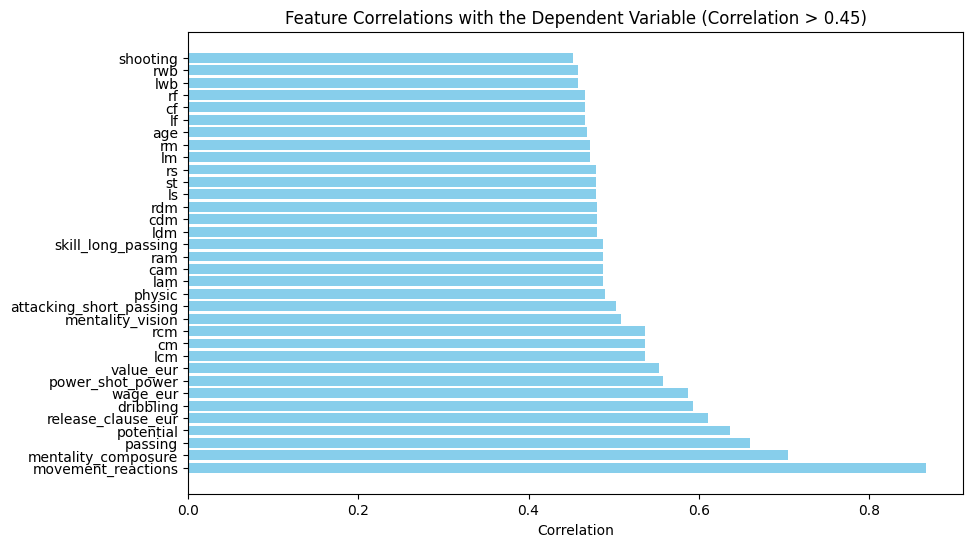

In [23]:
# Calculating the correlation between each feature and the dependent variable
correlations = [X.iloc[:, i].corr(y) for i in range(X.shape[1])]

# Createing a list of (column index, correlation) pairs
correlation_pairs = list(enumerate(correlations))

# Filtering pairs to include only those with correlation greater than 0.5
correlation_pairs_filtered = [(i, corr) for i, corr in correlation_pairs if abs(corr) > 0.45]

# Sorting the filtered pairs by the absolute correlation value in descending order
correlation_pairs_filtered.sort(key=lambda x: abs(x[1]), reverse=True)

# Extracting feature names for the filtered pairs
selected_feature_indices, selected_correlation_values = zip(*correlation_pairs_filtered)
selected_feature_names = [X.columns[i] for i in selected_feature_indices]

# Visualizing the correlations for the selected features using a bar chart
plt.figure(figsize=(10, 6))
plt.barh(selected_feature_names, selected_correlation_values, color='skyblue')
plt.xlabel('Correlation')
plt.title('Feature Correlations with the Dependent Variable (Correlation > 0.45)')
plt.show()

In [24]:
# Feature selection using SelectKBest, selecting a maximum of 12 features
selector = SelectKBest(score_func=f_regression, k=12)
X_selected = selector.fit_transform(X, y)
X_selected_22 = selector.fit_transform(X_22,y_22)

In [25]:
selected_feature_indices = selector.get_support()
selected_feature_names = X_22.columns[selected_feature_indices]
original_feature_names = []

print("Selected Feature Names:")
for feature_name in selected_feature_names:
    print(feature_name)
    original_feature_names.append(feature_name)

Selected Feature Names:
potential
value_eur
wage_eur
release_clause_eur
passing
dribbling
movement_reactions
power_shot_power
mentality_composure
lcm
cm
rcm


#### Selected feature subsets showing maximum correlation with the dependent variable

In [26]:
# Calculating the correlation coefficients for the selected features
correlations = [np.corrcoef(X_selected[:, i], y)[0, 1] for i in range(X_selected.shape[1])]

# Createing a list of (feature_index, correlation) pairs
correlation_pairs = list(enumerate(correlations))

# Sorting the pairs by the absolute correlation value in descending order
correlation_pairs.sort(key=lambda x: abs(x[1]), reverse=True)

# Showing the top features with the highest absolute correlation
max_correlation_features = [pair[0] for pair in correlation_pairs]

# Mapping the selected feature indices to their names
selected_feature_names = [original_feature_names[i] for i in max_correlation_features]
print(selected_feature_names)


['movement_reactions', 'mentality_composure', 'passing', 'potential', 'release_clause_eur', 'dribbling', 'wage_eur', 'power_shot_power', 'value_eur', 'lcm', 'cm', 'rcm']


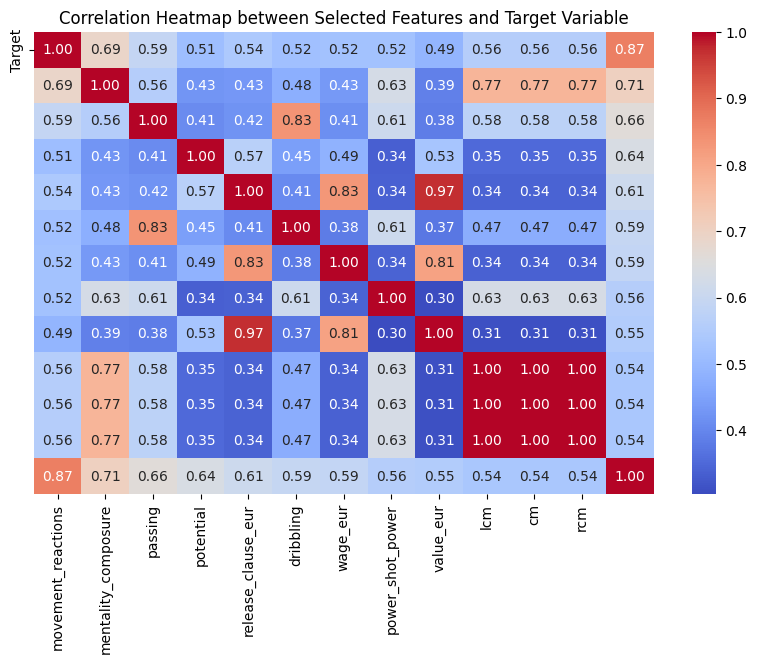

In [27]:
# Calculating the correlation matrix between the selected features and the target variable
correlation_matrix = np.corrcoef(X_selected[:, max_correlation_features], y, rowvar=False)

# Creating a heatmap
plt.figure(figsize=(10, 6))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=selected_feature_names, yticklabels=['Target'], fmt=".2f")
plt.title("Correlation Heatmap between Selected Features and Target Variable")
plt.show()

In [28]:
# Creating a new DataFrame with only the selected features
X_selected = X[selected_feature_names]
X_selected_22 = X_22[selected_feature_names]
X_selected

,movement_reactions,mentality_composure,passing,potential,release_clause_eur,dribbling,wage_eur,power_shot_power,value_eur,lcm,cm,rcm
0,94.0,96.0,91.0,93.0,138400000.0,95.0,560000.0,86.0,103500000.0,90,90,90
1,95.0,95.0,81.0,92.0,75900000.0,89.0,220000.0,94.0,63000000.0,84,84,84
2,93.0,88.0,78.0,91.0,132000000.0,85.0,240000.0,89.0,111000000.0,82,82,82
3,91.0,93.0,86.0,91.0,166500000.0,94.0,270000.0,80.0,132000000.0,86,86,86
4,91.0,91.0,93.0,91.0,161000000.0,88.0,370000.0,91.0,129000000.0,91,91,91
...,...,...,...,...,...,...,...,...,...,...,...,...
18939,48.0,40.0,26.0,52.0,57000.0,27.0,1000.0,35.0,70000.0,34,34,34
18940,50.0,35.0,49.0,53.0,72000.0,47.0,1000.0,38.0,70000.0,49,49,49
18941,44.0,35.0,49.0,47.0,47000.0,46.0,2000.0,49.0,45000.0,54,54,54
18942,53.0,45.0,40.0,67.0,165000.0,53.0,500.0,50.0,130000.0,45,45,45


### Feature Scaling

In [30]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
X_selected=pd.DataFrame(scaler.transform(X_scaled), columns=X_selected.columns)
X_22_scaled = scaler.fit_transform(X_selected_22)
X_selected_22 = pd.DataFrame(scaler.transform(X_22_scaled), columns=X_selected_22.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Splitting the data into training and testing sets

In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

## Creating and training suitable machine learning models with cross-validation that can predict a player's rating

In [33]:
# Training a Linear Regression model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model_lr.predict(X_test)


In [35]:
# Evaluate the model
mae_lr_21 = mean_absolute_error(y_test, y_pred)
mse_lr_21 = mean_squared_error(y_test, y_pred)
r2_lr_21 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae_lr_21}")
print(f"Mean Squared Error: {mse_lr_21}")
print(f"R-squared: {r2_lr_21}")

# Making predictions on the test_data
test_data_predictions = model_lr.predict(X_selected)

Mean Absolute Error: 2.1302850596836795
Mean Squared Error: 7.515933068915495
R-squared: 0.8405444533091542


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import scipy.stats

# Performing 5-fold cross-validation and getting RMSE scores
rmse_scores = np.sqrt(-cross_val_score(model_lr, X_selected, y, cv=5, scoring='neg_mean_squared_error'))

# Calculating the mean RMSE
mean_rmse = np.mean(rmse_scores)

# Calculating the standard error of the mean
sem_rmse = scipy.stats.sem(rmse_scores)

# Calculating the degrees of freedom
dof = len(rmse_scores) - 1

# Calculating the t-score for a 95% confidence interval
t_score = scipy.stats.t.ppf(0.975, dof)

# Calculating the margin of error
margin_of_error = t_score * sem_rmse

# Calculating the confidence interval
confidence_interval = (mean_rmse - margin_of_error, mean_rmse + margin_of_error)

# Printing the mean RMSE and the confidence interval
print(f"Mean RMSE: {mean_rmse}")
print(f"95% Confidence Interval: {confidence_interval}")

Mean RMSE: 11.12301494342136
95% Confidence Interval: (-10.678819959874012, 32.92484984671673)


#### Based on these metrics:
- on average, the linear model has a mean RMSE of approximately 11.12, indicating a reasonably bad fit to the data.
- Moreover, the wide confidence interval also indicates a bad fit with the data.
- Hence we are going to train other models and evaluate their perfomance again.

In [43]:
# Training a RandomForestRegressor model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# hyperparameter grid to search over for best parameters
param_grid = {
    'n_estimators': [100, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Creating the RandomForestRegressor model
model_rf = RandomForestRegressor(random_state=42)

# Using GridSearchCV to search for the best hyperparameters using cross-validation
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluating the best model on the validation set
y_pred_rf = best_rf_model.predict(X_test)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

In [44]:
# Model evaluation for Random Forest
mae_rf_21 = mean_absolute_error(y_test, y_pred_rf)
mse_rf_21 = mean_squared_error(y_test, y_pred_rf)
r2_rf_21 = r2_score(y_test, y_pred_rf)

print("Random Forest:")
print(f"Mean Absolute Error: {mae_rf_21}")
print(f"Mean Squared Error: {mse_rf_21}")
print(f"R-squared: {r2_rf_21}")

Random Forest:
Mean Absolute Error: 1.4069588856322301
Mean Squared Error: 3.7357915706952576
R-squared: 0.9207426833413485


In [45]:
# Performing 5-fold cross-validation and getting RMSE scores for the Random Forest Regressor
rmse_rf_scores = np.sqrt(-cross_val_score(best_rf_model, X_selected, y, cv=5, scoring='neg_mean_squared_error'))

# Calculating the mean RMSE
mean_rf_rmse = np.mean(rmse_rf_scores)

# Calculating the standard error of the mean
sem_rf_rmse = scipy.stats.sem(rmse_rf_scores)

# Calculating the degrees of freedom
dof_rf = len(rmse_rf_scores) - 1

# Calculating the t-score for a 95% confidence interval
t_score_rf = scipy.stats.t.ppf(0.975, dof_rf)

# Calculating the margin of error
margin_of_error_rf = t_score_rf * sem_rf_rmse

# Calculating the confidence interval
confidence_interval_rf = (mean_rf_rmse - margin_of_error_rf, mean_rf_rmse + margin_of_error_rf)

# Printing the mean RMSE and the confidence interval
print(f"Mean RMSE: {mean_rf_rmse}")
print(f"95% Confidence Interval: {confidence_interval_rf}")

Mean RMSE: 4.145533324745889
95% Confidence Interval: (1.515280440411452, 6.7757862090803265)


In [46]:
#Gradient Boosting
model_gb = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01, max_depth=10, random_state=42)
model_gb.fit(X_train, y_train)
# cv=KFold(n_splits=3)

# PARAMETERS ={
# "max_depth":[2,5, 6, 12],
# "learning_rate":[0.3, 0.1, 0.03],
# "n_estimators":[100,500,1000]}

# gd=GradientBoostingClassifier()

# model_gb = GridSearchCV(gd,param_grid=PARAMETERS,cv=cv,scoring="accuracy")
# model_gb.fit(X_train,y_train)
y_pred_gb = model_gb.predict(X_test)

In [47]:
# Model evaluation for Gradient Boosting
mae_gb_21 = mean_absolute_error(y_test, y_pred_gb)
mse_gb_21 = mean_squared_error(y_test, y_pred_gb)
r2_gb_21 = r2_score(y_test, y_pred_gb)

# Printing evaluation metrics for each model
print("\nGradient Boosting:")
print(f"Mean Absolute Error: {mae_gb_21}")
print(f"Mean Squared Error: {mse_gb_21}")
print(f"R-squared: {r2_gb_21}")


Gradient Boosting:
Mean Absolute Error: 1.375606664016818
Mean Squared Error: 3.738280697354938
R-squared: 0.9206898748545428


In [48]:
# Performing 5-fold cross-validation and getting RMSE scores for the GB
rmse_gb_scores = np.sqrt(-cross_val_score(model_gb, X_selected, y, cv=5, scoring='neg_mean_squared_error'))

# Calculating the mean RMSE
mean_gb_rmse = np.mean(rmse_gb_scores)

# Calculating the standard error of the mean
sem_gb_rmse = scipy.stats.sem(rmse_gb_scores)

# Calculating the degrees of freedom
dof_gb = len(rmse_gb_scores) - 1

# Calculating the t-score for a 95% confidence interval
t_score_gb = scipy.stats.t.ppf(0.975, dof_gb)

# Calculating the margin of error
margin_of_error_gb = t_score_gb * sem_gb_rmse

# Calculating the confidence interval
confidence_interval_gb = (mean_gb_rmse - margin_of_error_gb, mean_gb_rmse + margin_of_error_gb)

# Printing the mean RMSE and the confidence interval
print(f"Mean RMSE: {mean_gb_rmse}")
print(f"95% Confidence Interval: {confidence_interval_gb}")

Mean RMSE: 4.206397063042432
95% Confidence Interval: (2.0001331645281266, 6.412660961556737)


In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Training a K-Nearest Neighbors (KNN) model
model_knn = KNeighborsRegressor(n_neighbors=40)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)


In [50]:
# Evaluating the KNN model
mae_knn_21 = mean_absolute_error(y_test, y_pred_knn)
mse_knn_21 = mean_squared_error(y_test, y_pred_knn)
r2_knn_21 = r2_score(y_test, y_pred_knn)

print("K-Nearest Neighbors (KNN):")
print(f"Mean Absolute Error (KNN): {mae_knn_21}")
print(f"Mean Squared Error (KNN): {mse_knn_21}")
print(f"R-squared (KNN): {r2_knn_21}")

K-Nearest Neighbors (KNN):
Mean Absolute Error (KNN): 1.6379783584059115
Mean Squared Error (KNN): 4.86668975983109
R-squared (KNN): 0.8967499219174682


In [51]:
# Performing 5-fold cross-validation and getting RMSE scores for the KNN Regressor
rmse_knn_scores = np.sqrt(-cross_val_score(model_knn, X_selected, y, cv=5, scoring='neg_mean_squared_error'))

# Calculating the mean RMSE
mean_knn_rmse = np.mean(rmse_knn_scores)

# Calculating the standard error of the mean
sem_knn_rmse = scipy.stats.sem(rmse_knn_scores)

# Calculating the degrees of freedom
dof_knn = len(rmse_knn_scores) - 1

# Calculating the t-score for a 95% confidence interval
t_score_knn = scipy.stats.t.ppf(0.975, dof_knn)

# Calculating the margin of error
margin_of_error_knn = t_score_knn * sem_knn_rmse

# Calculating the confidence interval
confidence_interval_knn = (mean_knn_rmse - margin_of_error_knn, mean_knn_rmse + margin_of_error_knn)

# Printing the mean RMSE and the confidence interval
print(f"Mean RMSE: {mean_knn_rmse}")
print(f"95% Confidence Interval: {confidence_interval_knn}")

Mean RMSE: 4.407674168241458
95% Confidence Interval: (1.7257348142006026, 7.089613522282313)


In [52]:
import xgboost as xgb

In [53]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_test, label=y_test)

In [54]:
params = {
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror'
}

model_xgb = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtrain, 'train'), (dval, 'val')])


[0]	train-rmse:6.46549	val-rmse:6.31156
[1]	train-rmse:5.95847	val-rmse:5.81913
[2]	train-rmse:5.51886	val-rmse:5.39203
[3]	train-rmse:5.13358	val-rmse:5.01590
[4]	train-rmse:4.78758	val-rmse:4.68319
[5]	train-rmse:4.47268	val-rmse:4.37980
[6]	train-rmse:4.20593	val-rmse:4.12096
[7]	train-rmse:3.96502	val-rmse:3.88649
[8]	train-rmse:3.74561	val-rmse:3.67084
[9]	train-rmse:3.54532	val-rmse:3.47986
[10]	train-rmse:3.38120	val-rmse:3.32070
[11]	train-rmse:3.22706	val-rmse:3.17390
[12]	train-rmse:3.10267	val-rmse:3.05389
[13]	train-rmse:2.98740	val-rmse:2.94450
[14]	train-rmse:2.88778	val-rmse:2.85048
[15]	train-rmse:2.80057	val-rmse:2.76633
[16]	train-rmse:2.71646	val-rmse:2.68803
[17]	train-rmse:2.64584	val-rmse:2.62320
[18]	train-rmse:2.58549	val-rmse:2.56411
[19]	train-rmse:2.53531	val-rmse:2.51776
[20]	train-rmse:2.49093	val-rmse:2.47303
[21]	train-rmse:2.45350	val-rmse:2.43663
[22]	train-rmse:2.41757	val-rmse:2.40249
[23]	train-rmse:2.38627	val-rmse:2.37062
[24]	train-rmse:2.35823	va

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:08:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[35]	train-rmse:2.17031	val-rmse:2.16507
[36]	train-rmse:2.16078	val-rmse:2.15614
[37]	train-rmse:2.15317	val-rmse:2.15108
[38]	train-rmse:2.14718	val-rmse:2.14536
[39]	train-rmse:2.14043	val-rmse:2.13962
[40]	train-rmse:2.13149	val-rmse:2.13263
[41]	train-rmse:2.12111	val-rmse:2.12331
[42]	train-rmse:2.11247	val-rmse:2.11559
[43]	train-rmse:2.10649	val-rmse:2.11144
[44]	train-rmse:2.10038	val-rmse:2.10647
[45]	train-rmse:2.09666	val-rmse:2.10287
[46]	train-rmse:2.09136	val-rmse:2.09932
[47]	train-rmse:2.08709	val-rmse:2.09514
[48]	train-rmse:2.08243	val-rmse:2.09172
[49]	train-rmse:2.07452	val-rmse:2.08422
[50]	train-rmse:2.06938	val-rmse:2.08039
[51]	train-rmse:2.06689	val-rmse:2.07789
[52]	train-rmse:2.06383	val-rmse:2.07596
[53]	train-rmse:2.06027	val-rmse:2.07317
[54]	train-rmse:2.05598	val-rmse:2.06941
[55]	train-rmse:2.05288	val-rmse:2.06641
[56]	train-rmse:2.04910	val-rmse:2.06162
[57]	train-rmse:2.04600	val-rmse:2.05847
[58]	train-rmse:2.04240	val-rmse:2.05588
[59]	train-rmse:

In [55]:
# Evaluating the XGB model

dtest = xgb.DMatrix(X_test)
y_pred_xgb = model_xgb.predict(dtest)

mse_xgb_21 = mean_squared_error(y_test, y_pred_xgb)
mae_xgb_21 = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb_21 = r2_score(y_test, y_pred_xgb)

print("(XGB):")
print(f"Mean Absolute Error (XGB): {mae_xgb_21}")
print(f"Mean Squared Error (XGB): {mse_xgb_21}")
print(f"R-squared (XGB): {r2_xgb_21}")

(XGB):
Mean Absolute Error (XGB): 1.4831837784743742
Mean Squared Error (XGB): 3.851481886044846
R-squared (XGB): 0.9182882359278662


In [56]:
# a parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'objective': ['reg:squarederror']
}

# Initializing an XGBoost Regressor
xgb_reg = xgb.XGBRegressor()

# Creating a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)

# Fitting the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters and corresponding RMSE
print("Best Hyperparameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))

# Getting the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Making predictions using the best model
y_pred = best_model.predict(X_test)

# Calculating RMSE on the validation set
val_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Validation RMSE with Best Model:", val_rmse)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.8}
Best RMSE: 1.6856646484561535
Validation RMSE with Best Model: 1.6195420035277526


In [57]:
# Performing 5-fold cross-validation and getting RMSE scores for the XGB Regressor
rmse_xgb_scores = np.sqrt(-cross_val_score(best_model, X_selected, y, cv=5, scoring='neg_mean_squared_error'))

# Calculating the mean RMSE
mean_xgb_rmse = np.mean(rmse_xgb_scores)

# Calculating the standard error of the mean
sem_xgb_rmse = scipy.stats.sem(rmse_xgb_scores)

# Calculating the degrees of freedom
dof_xgb = len(rmse_xgb_scores) - 1

# Calculating the t-score for a 95% confidence interval
t_score_xgb = scipy.stats.t.ppf(0.975, dof_xgb)

# Calculating the margin of error
margin_of_error_xgb = t_score_xgb * sem_xgb_rmse

# Calculating the confidence interval
confidence_interval_xgb = (mean_xgb_rmse - margin_of_error_xgb, mean_xgb_rmse + margin_of_error_xgb)

# Printing the mean RMSE and the confidence interval
print(f"Mean RMSE: {mean_xgb_rmse}")
print(f"95% Confidence Interval: {confidence_interval_xgb}")

Mean RMSE: 3.758287537331796
95% Confidence Interval: (1.358962810289349, 6.157612264374244)


In [58]:
y_pred_xgb = best_model.predict(X_test)

mse_xgb_21 = mean_squared_error(y_test, y_pred_xgb)
mae_xgb_21 = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb_21 = r2_score(y_test, y_pred_xgb)

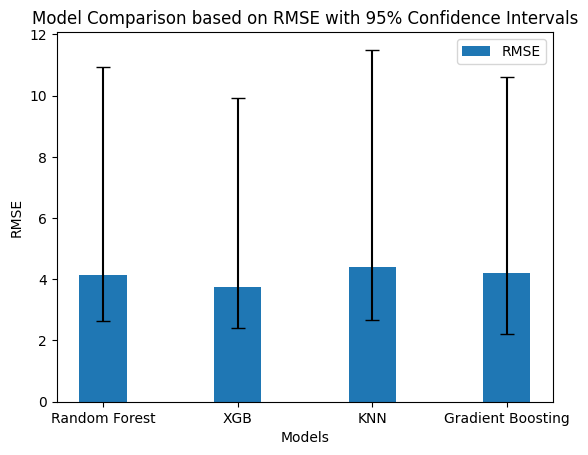

In [59]:
# RMSE and confidence interval results
rmse_values = [mean_rf_rmse, mean_xgb_rmse,mean_knn_rmse, mean_gb_rmse]
confidence_intervals = [
    confidence_interval_rf,
    confidence_interval_xgb,
    confidence_interval_knn,
    confidence_interval_gb,
]
model_names = ['Random Forest', 'XGB', 'KNN','Gradient Boosting']

# Extracting the lower and upper bounds of the confidence intervals
lower_bounds = [ci[0] for ci in confidence_intervals]
upper_bounds = [ci[1] for ci in confidence_intervals]

# Creating a bar plot
x = np.arange(len(model_names))
fig, ax = plt.subplots()
width = 0.35

ax.bar(x, rmse_values, width, label='RMSE', yerr=[lower_bounds, upper_bounds], capsize=5)
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Model Comparison based on RMSE with 95% Confidence Intervals')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

plt.show()

- From the model comparisons, the XGB model is outperfoming all the other models with the knn perfoming least
- Since the root mean squared error of the Random Forest, XGB and Gradient boosting model are small and close to each we will combine this models to train an ensembled model to improve the models prediction accuracy
- from this comparsion the linear model was left our because it was the least performing from the start indicated by its high rmse and a broader confidence level, hence we already disregarded it.

In [60]:
# Ensemble of models (VotingRegressor)
ensemble_model = VotingRegressor(estimators=[
    ('rf', model_rf),  # Random Forest
    ('gb', model_gb),  # Gradient Boosting
    ('xgb', best_model) # XGB model
])

ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

In [61]:
# Evaluating the ensemble model
mae_en_21 = mean_absolute_error(y_test, y_pred_ensemble)
mse_en_21 = mean_squared_error(y_test, y_pred_ensemble)
r2_en_21 = r2_score(y_test, y_pred_ensemble)

print("\nEnsemble of Models:")
print(f"Mean Absolute Error (Ensemble): {mae_en_21}")
print(f"Mean Squared Error (Ensemble): {mse_en_21}")
print(f"R-squared (Ensemble): {r2_en_21}")


Ensemble of Models:
Mean Absolute Error (Ensemble): 1.241510436906472
Mean Squared Error (Ensemble): 3.0634021589445486
R-squared (Ensemble): 0.9350078744036894


## Using the data from another season(players_22) which was not used during the training to test how good is the ensembled model.

In [62]:
# Making predictions on players_22 data using the Ensembled Model
predictions_22_en = ensemble_model.predict(X_selected_22)

In [63]:
mae_en_22 = mean_absolute_error(y_22,predictions_22_en)
mse_en_22 = mean_squared_error(y_22,predictions_22_en)
r2_en_22 = r2_score(y_22,predictions_22_en)

# Performing 5-fold cross-validation and getting RMSE scores for the Ensembled model on fifa 22 data
rmse_en_scores_22 = np.sqrt(-cross_val_score(ensemble_model, X_selected_22, y_22, cv=5, scoring='neg_mean_squared_error'))

# Calculating the mean RMSE
mean_en_rmse_22 = np.mean(rmse_en_scores_22)

# Calculating the standard error of the mean
sem_en_rmse_22 = scipy.stats.sem(rmse_en_scores_22)

# Calculating the degrees of freedom
dof_en_22 = len(rmse_en_scores_22) - 1

# Calculating the t-score for a 95% confidence interval
t_score_en_22 = scipy.stats.t.ppf(0.975, dof_en_22)

# Calculating the margin of error
margin_of_error_en_22 = t_score_en_22 * sem_en_rmse_22

# Calculating the confidence interval
confidence_interval_en_22 = (mean_en_rmse_22 - margin_of_error_en_22, mean_en_rmse_22 + margin_of_error_en_22)

# Printing the mean RMSE and the confidence interval
print(f"Mean RMSE: {mean_en_rmse_22}")
print(f"95% Confidence Interval: {confidence_interval_en_22}")

Mean RMSE: 3.993072618809484
95% Confidence Interval: (1.3650456977897685, 6.621099539829199)


## Conclusion
- The model demonstrates its effectiveness by yielding a Mean RMSE of 3.993 and a 95% Confidence Interval ranging from 1.365 to 6.621 when applied to a previously unseen dataset.
- This signifies that, on average, the model's predictions closely match the actual values, with the lower RMSE indicating higher predictive accuracy.
- Furthermore, the confidence interval gives us a 95% level of certainty that the model's performance typically falls within the specified range.
- While the model exhibits good predictive performance on this new dataset, the relatively wide confidence interval suggests some variability in performance across different data points, thereby providing valuable insights into its overall reliability and strengths in real-world applications.

## Saving the model and the scaler

In [64]:
import joblib

joblib.dump(ensemble_model, '/content/drive/MyDrive/ML/AI_Mid_Sem_Project/ensemble_model.pkl')

['/content/drive/MyDrive/ML/AI_Mid_Sem_Project/ensemble_model.pkl']

In [42]:
joblib.dump(scaler, '/content/drive/MyDrive/ML/AI_Mid_Sem_Project/scaler.pkl')

['/content/drive/MyDrive/ML/AI_Mid_Sem_Project/scaler.pkl']